This file is for the first paper, and it's using the model_first_paper.py for the agents

The reporters won't store the agents' position

In [1]:
from model_first_paper import *
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
map_width = 50
map_height = 50
moore = False

#Number of commuters, taxis, and noises
#num_of_motorist = [30,25,10]
num_of_motorist = [30,25,10]

#With inventory
inv_size = 24
cp_size = 8

#Without inventory
#cp_size = 10

model = switching_model(num_of_motorist,num_of_stations=10,inv_size=inv_size,cp_size= cp_size,width=map_width,height=map_height,moore=moore, configuration="less")

4
(12, 12)
(12, 37)
(37, 12)
(37, 37)


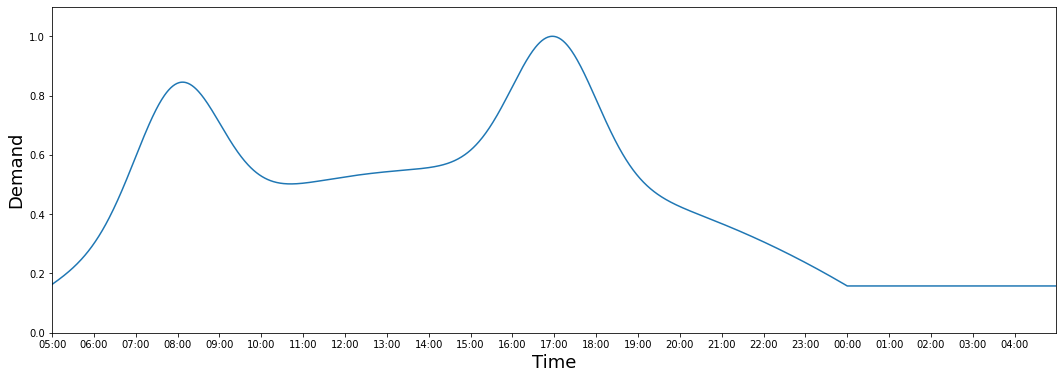

In [ ]:
model.draw_prob_des()

In [15]:
#run model
#Dalam menit
days = 30
num_of_step = days*24*60
#num_of_step = 100
for i in range(num_of_step):
    model.step()

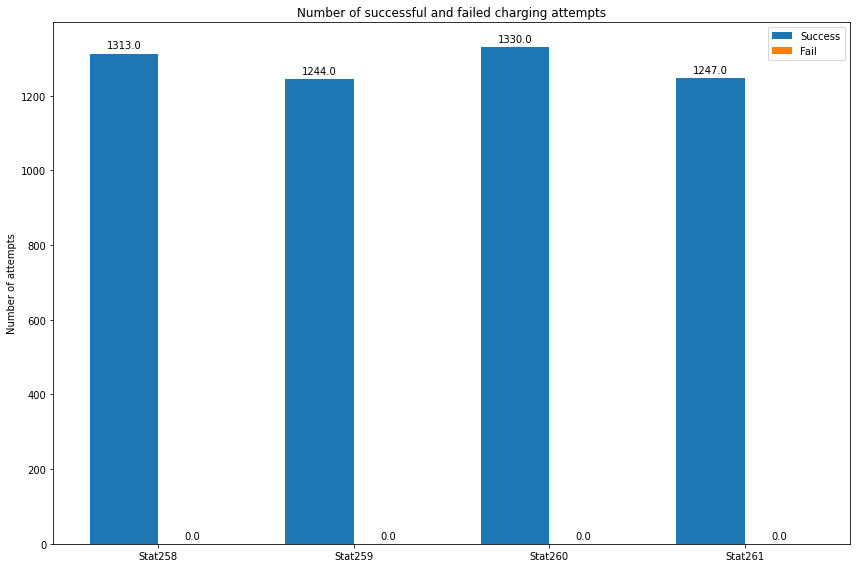

In [16]:
model.plot_reg()

In [ ]:
#Ambil data agent
agent_data = model.datacollector.get_agent_vars_dataframe()
agent_data.head()

Charge Alive
Step AgentID                   
0    0        1368.813576  None
     1        2048.396590  None
     2         635.993525  None
     3        1826.121014  None
     4         767.565734  None

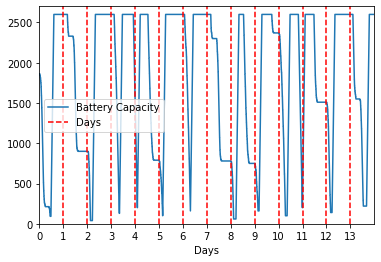

In [ ]:
#Cek baterai
battery_id = 8
battery_energy = agent_data.xs(battery_id, level = "AgentID")["Charge"]
battery_energy.plot()
plt.xlim(0,num_of_step)
plt.ylim(0,2700)
for i in range(1,days):
    plt.axvline(x = 1440*i, color = 'r', linestyle='--', label = 'axvline - full height')
plt.legend(['Battery Capacity','Days'])
locs, labels = plt.xticks()  # Get the current locations and labels.
plt.xticks(np.arange(0, days*1440, step=1440))  # Set label locations.
plt.xticks(np.arange(days)*1440, np.arange(0,days))  # Set text labels.
#plt.xticks([0, 1, 2], ['January', 'February', 'March'],
#       rotation=20)  # Set text labels and properties.
plt.xlabel('Days')
#plt.title('Example of Battery Charge Cycle')
plt.show()

In [ ]:
model_data = model.datacollector.get_model_vars_dataframe()
model_data.tail()

,num_of_alive,num_of_charging
20155,42,2
20156,42,2
20157,42,2
20158,42,2
20159,42,2


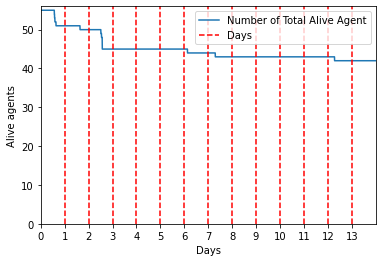

In [ ]:
plt.plot(model_data["num_of_alive"])
plt.ylim([0,sum(num_of_motorist) + 1])
plt.ylabel("Alive agents")
plt.xlabel("Steps")
plt.xlim(0,num_of_step)
for i in range(1,days):
    plt.axvline(x = 1440*i, color = 'r', linestyle='--', label = 'axvline - full height')
plt.legend(['Number of Total Alive Agent','Days'])
locs, labels = plt.xticks()  # Get the current locations and labels.
plt.xticks(np.arange(0, days*1440, step=1440))  # Set label locations.
plt.xticks(np.arange(days)*1440, np.arange(0,days))  # Set text labels.
#plt.xticks([0, 1, 2], ['January', 'February', 'March'],
#       rotation=20)  # Set text labels and properties.
plt.xlabel('Days')
#plt.title('Number of Total Alive Agent')
plt.show()

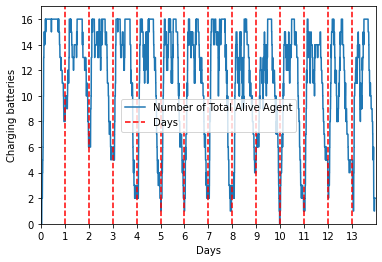

In [ ]:
plt.plot(model_data["num_of_charging"])
plt.ylim([0,model.num_of_stations*model.cp_size +1])
plt.ylabel("Charging batteries")
plt.xlabel("Steps")
plt.xlim(0,num_of_step)
for i in range(1,days):
    plt.axvline(x = 1440*i, color = 'r', linestyle='--', label = 'axvline - full height')
plt.legend(['Number of Total Alive Agent','Days'])
locs, labels = plt.xticks()  # Get the current locations and labels.
plt.xticks(np.arange(0, days*1440, step=1440))  # Set label locations.
plt.xticks(np.arange(days)*1440, np.arange(0,days))  # Set text labels.
#plt.xticks([0, 1, 2], ['January', 'February', 'March'],
#       rotation=20)  # Set text labels and properties.
plt.xlabel('Days')
#plt.title('Number of Total Alive Agent')
plt.show()

In [ ]:
#Cek kategori motorist yang hidup
commuter_alive = 0
taxi_alive = 0
noise_alive = 0

for mot in model.motorists:
    if mot.alive:
        if mot.status == "commuter":
            commuter_alive +=1
        elif mot.status == "taxi":
            taxi_alive +=1
        elif mot.status == "noise":
            noise_alive += 1

print("Jumlah pemotor yang hidup masing-masing sebagai berikut:")
print('Commuter: ' + str(commuter_alive))
print('Taxi: ' + str(taxi_alive))
print('Noise: ' + str(noise_alive))

Jumlah pemotor yang hidup masing-masing sebagai berikut:
Commuter: 27
Taxi: 13
Noise: 2
